<a href="https://colab.research.google.com/github/SeneshaMandakini/Predictive_Modeling_for_Tourism_Arrivals/blob/main/Final_Toursim_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Imports

In [ ]:
#Import numpy for performing the statistical and mathematical operations on the data set
import numpy as np

#Import sklearn for preprocessing
from sklearn import preprocessing

#Import pandas to read files and create dataframe such as panel data
import pandas as pd

#Import Metplot for providing a way to visualize data
import matplotlib.pyplot as plt

#Import seaborn for attractive and information centric statistical graphical representation
import seaborn as sns

#To read text files
from numpy import loadtxt

#To load the files
from google.colab import files

#To preprocess
from sklearn.preprocessing import MinMaxScaler

#RF for feature imporatance
from sklearn.ensemble import RandomForestRegressor

#Import the matrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#To split the data
from sklearn.model_selection import TimeSeriesSplit

#To get a detailed statistical summary
import statsmodels.api as sm
from statsmodels.tsa.api import SARIMAX
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#For the LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

#Linear regression as baseline using last weather data points for the naive forcast
from sklearn.linear_model import LinearRegression

import itertools

from sklearn.svm import SVR

from sklearn.model_selection import TimeSeriesSplit


In [ ]:
#Upload the Data
upload = files.upload()

Saving Met data.csv to Met data (2).csv


In [ ]:
#Read the csv file
Met_data = pd.read_csv('Met data (2).csv')

#Descriptive analyse

In [ ]:
#Shape of the dataset
Met_data.shape

(82, 10)

In [ ]:
#Full view of dataset
Met_data

,Year,Month,RH Max,RH Min,Temp Max,Temp Min,AQI,Wind Speed X,Wind Speed Y,Tourists Arrivals
0,2017,1,81.322581,66.838710,31.206452,22.912903,NaN,8.3,5.4,219360
1,2017,2,82.142857,66.642857,31.392857,23.325000,NaN,6.6,4.7,197517
2,2017,3,88.225806,71.290323,31.332258,24.851613,NaN,6.4,3.7,188076
3,2017,4,83.466667,72.000000,32.480000,27.046667,NaN,6.7,4.0,160249
4,2017,5,85.225806,75.580645,31.819355,26.483871,NaN,7.3,5.0,121891
...,...,...,...,...,...,...,...,...,...,...
77,2023,6,85.433333,78.700000,31.276667,26.750000,51.3667,NaN,NaN,100388
78,2023,7,85.451613,78.096774,30.670968,26.729032,53.1600,NaN,NaN,143039
79,2023,8,85.451613,78.096774,30.670968,26.729032,51.5484,NaN,NaN,136405
80,2023,9,85.451613,78.096774,30.670968,26.729032,42.9667,NaN,NaN,111938


In [ ]:
#Info of the columns of dataset
Met_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               82 non-null     int64  
 1   Month              82 non-null     int64  
 2   RH Max             81 non-null     float64
 3   RH Min             82 non-null     float64
 4   Temp Max           81 non-null     float64
 5   Temp Min           82 non-null     float64
 6   AQI                74 non-null     float64
 7   Wind Speed X       72 non-null     float64
 8   Wind Speed Y       72 non-null     float64
 9   Tourists Arrivals  82 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 6.5 KB


In [ ]:
summary = Met_data.describe()

# Display the summary
print(summary)

              Year      Month     RH_Max     RH_Min  Temperature_Max  \
count    82.000000  82.000000  81.000000  82.000000        81.000000   
mean   2019.926829   6.378049  86.229173  74.494800        31.142083   
std       1.980027   3.423377   2.911663   4.596753         0.823911   
min    2017.000000   1.000000  79.379310  63.034483        29.777419   
25%    2018.000000   3.250000  84.483871  71.206509        30.510000   
50%    2020.000000   6.000000  86.032258  75.951075        31.045161   
75%    2022.000000   9.000000  88.096774  78.096774        31.766667   
max    2023.000000  12.000000  92.903226  80.966667        33.320690   

       Temperature_Min         AQI  Wind_Speed_X  Wind_Speed_Y  \
count        82.000000   74.000000     72.000000     72.000000   
mean         25.288351   70.257853      5.605556      4.091667   
std           1.121941   25.494542      1.208175      1.197150   
min          22.883871   35.064500      2.600000      1.500000   
25%          24.27564

In [ ]:
#Check the null values of dataset
Met_data.isnull()

,Year,Month,RH_Max,RH_Min,Temperature_Max,Temperature_Min,AQI,Wind_Speed_X,Wind_Speed_Y,Tourists_arrivals
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
77,False,False,False,False,False,False,False,True,True,False
78,False,False,False,False,False,False,False,True,True,False
79,False,False,False,False,False,False,False,True,True,False
80,False,False,False,False,False,False,False,True,True,False


<Axes: >

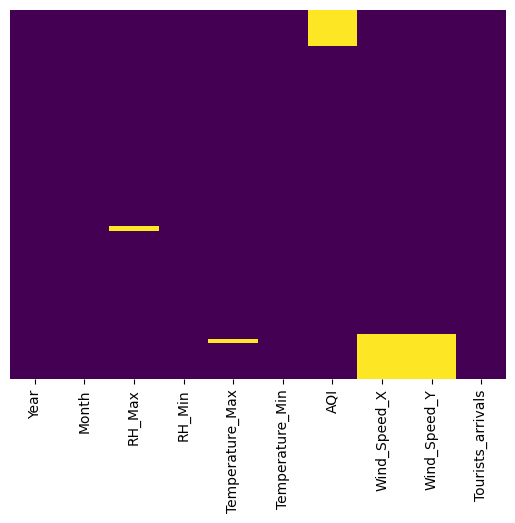

In [ ]:
#Using heatmap for better visualization to get null values
sns.heatmap(Met_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Group by month and compute the mean, ignoring the year
monthly_means = Met_data.groupby('Month').transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Fill the null values with these monthly means
Met_data_filled = Met_data.fillna(monthly_means)

<Axes: >

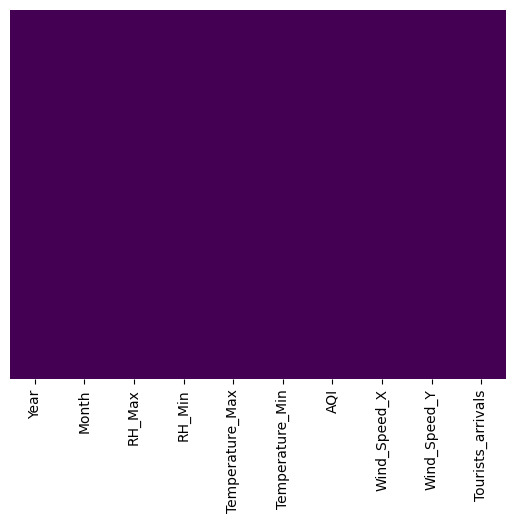

In [ ]:
#Using heatmap for better visualization
sns.heatmap(Met_data_filled.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
Met_data_filled

,Year,Month,RH_Max,RH_Min,Temperature_Max,Temperature_Min,AQI,Wind_Speed_X,Wind_Speed_Y,Tourists_arrivals
0,2017,1,81.322581,66.838710,31.206452,22.912903,103.634450,8.300000,5.400000,219360
1,2017,2,82.142857,66.642857,31.392857,23.325000,99.496900,6.600000,4.700000,197517
2,2017,3,88.225806,71.290323,31.332258,24.851613,93.311150,6.400000,3.700000,188076
3,2017,4,83.466667,72.000000,32.480000,27.046667,61.906533,6.700000,4.000000,160249
4,2017,5,85.225806,75.580645,31.819355,26.483871,52.220433,7.300000,5.000000,121891
...,...,...,...,...,...,...,...,...,...,...
77,2023,6,85.433333,78.700000,31.276667,26.750000,51.366700,5.983333,5.033333,100388
78,2023,7,85.451613,78.096774,30.670968,26.729032,53.160000,5.950000,4.783333,143039
79,2023,8,85.451613,78.096774,30.670968,26.729032,51.548400,5.900000,4.850000,136405
80,2023,9,85.451613,78.096774,30.670968,26.729032,42.966700,5.450000,4.316667,111938


In [ ]:
#drop to year and month column and create a new df to chek the correlation
Met_data_filled_V = Met_data_filled.drop(['Year', 'Month'], axis=1)

In [ ]:
summary = Met_data_filled_V.describe()

# Display the summary
print(summary)

          RH_Max     RH_Min  Temperature_Max  Temperature_Min        AQI  \
count  82.000000  82.000000        82.000000        82.000000  82.000000   
mean    0.502536   0.639092         0.388474         0.561710   0.371148   
std     0.216954   0.256341         0.233049         0.262096   0.267332   
min     0.000000   0.000000         0.000000         0.000000   0.000000   
25%     0.363553   0.455718         0.211510         0.325132   0.128867   
50%     0.488282   0.720302         0.362341         0.590806   0.342425   
75%     0.643423   0.839959         0.572568         0.784803   0.617196   
max     1.000000   1.000000         1.000000         1.000000   1.000000   

       Wind_Speed_X  Wind_Speed_Y  Tourists_arrivals  Tourism_Arrivals_Lag1  \
count     82.000000     82.000000          82.000000              81.000000   
mean       0.528990      0.440127           4.455442               4.448247   
std        0.203345      0.195316           1.338814               1.345559   

In [ ]:
#Check the correlation between variables
print(Met_data_filled_V.corr())

                     RH Max    RH Min  Temp Max  Temp Min       AQI  \
RH Max             1.000000  0.599421 -0.369659 -0.031372 -0.204683   
RH Min             0.599421  1.000000 -0.718850  0.563909 -0.750867   
Temp Max          -0.369659 -0.718850  1.000000 -0.109887  0.384515   
Temp Min          -0.031372  0.563909 -0.109887  1.000000 -0.752563   
AQI               -0.204683 -0.750867  0.384515 -0.752563  1.000000   
Wind Speed X      -0.627549 -0.416718  0.206350 -0.011425  0.296044   
Wind Speed Y      -0.448130  0.001306 -0.240122  0.146014  0.018876   
Tourists Arrivals -0.161652 -0.408186  0.152912 -0.315478  0.619033   

                   Wind Speed X  Wind Speed Y  Tourists Arrivals  
RH Max                -0.627549     -0.448130          -0.161652  
RH Min                -0.416718      0.001306          -0.408186  
Temp Max               0.206350     -0.240122           0.152912  
Temp Min              -0.011425      0.146014          -0.315478  
AQI                    0.

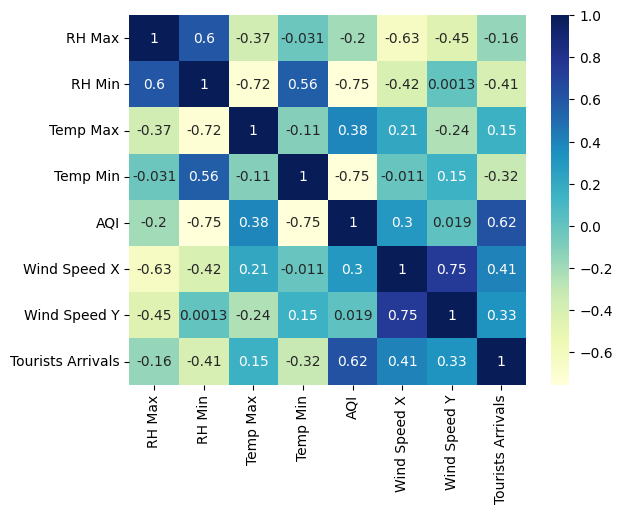

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(Met_data_filled_V.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [ ]:
# Combine year and month into a single date column
Met_data_filled['date'] = Met_data_filled['Year'].astype(str) + '-' + Met_data_filled['Month'].astype(str)

In [ ]:
# Convert the 'date' column to datetime format
Met_data_filled['date'] = pd.to_datetime(Met_data_filled['date'])

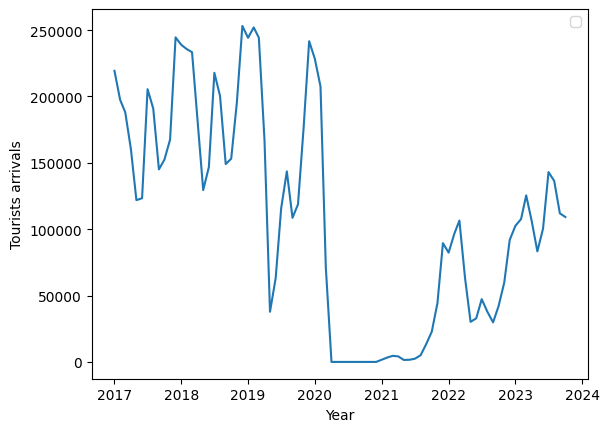

In [ ]:
#Tourist arrivals visualize with Date
plt.plot(Met_data_filled['date'], Met_data_filled['Tourists_arrivals'])
plt.xlabel('Year')
plt.ylabel('Tourists arrivals')
plt.legend()
plt.show()

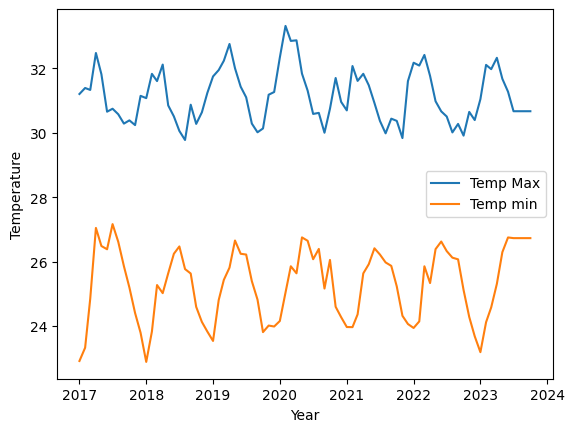

In [ ]:
#Tempeture visualize with date
plt.plot(Met_data_filled['date'], Met_data_filled['Temperature_Max'],label='Temp Max')
plt.plot(Met_data_filled['date'], Met_data_filled['Temperature_Min'],label='Temp min')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

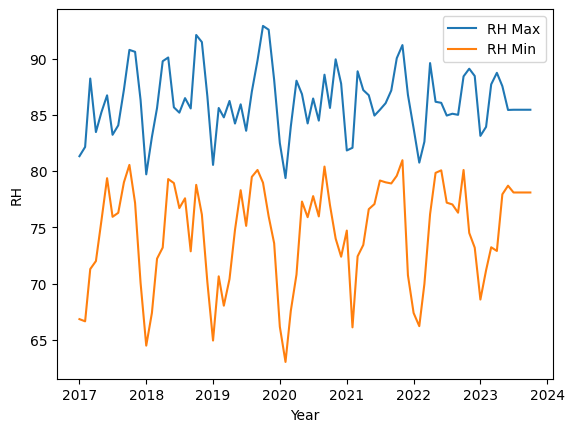

In [ ]:
#RH visualize with date
plt.plot(Met_data_filled['date'], Met_data_filled['RH_Max'],label='RH Max')
plt.plot(Met_data_filled['date'], Met_data_filled['RH_Min'],label='RH Min')
plt.xlabel('Year')
plt.ylabel('RH')
plt.legend()
plt.show()

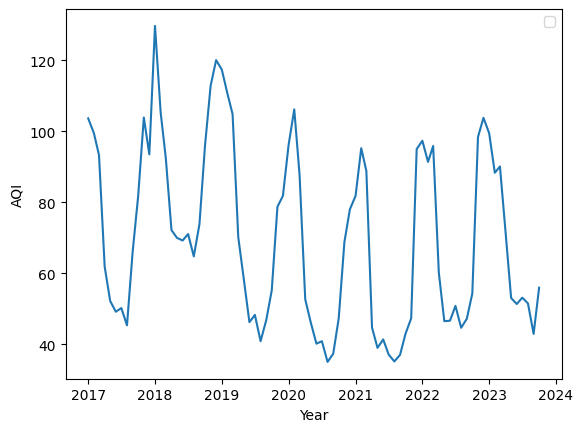

In [ ]:
#AQI visualize with Date
plt.plot(Met_data_filled['date'], Met_data_filled['AQI'])
plt.xlabel('Year')
plt.ylabel('AQI')
plt.legend()
plt.show()

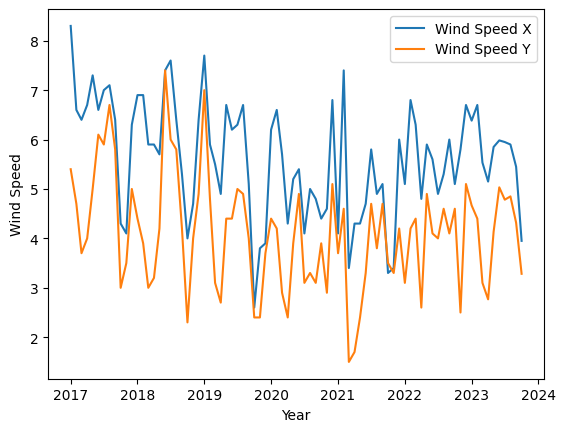

In [ ]:
#WindSpeed-X visualize with Date
plt.plot(Met_data_filled['date'], Met_data_filled['Wind_Speed_X'],label='Wind Speed X')
plt.plot(Met_data_filled['date'], Met_data_filled['Wind_Speed_Y'],label='Wind Speed Y')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

#Data Pre-Processing

In [ ]:
#Set MinMaxScaler to scaler
scaler = MinMaxScaler()

In [ ]:
# Reshape the data to 2D arrays and fit minmax scaler
Met_data_filled_V['AQI'] = scaler.fit_transform(np.array(Met_data_filled_V['AQI']).reshape(-1, 1))
Met_data_filled_V['Temp Max'] = scaler.fit_transform(np.array(Met_data_filled_V['Temp Max']).reshape(-1, 1))
Met_data_filled_V['Temp Min'] = scaler.fit_transform(np.array(Met_data_filled_V['Temp Min']).reshape(-1, 1))
Met_data_filled_V['RH Min'] = scaler.fit_transform(np.array(Met_data_filled_V['RH Min']).reshape(-1, 1))
Met_data_filled_V['RH Max'] = scaler.fit_transform(np.array(Met_data_filled_V['RH Max']).reshape(-1, 1))
Met_data_filled_V['Wind Speed X'] = scaler.fit_transform(np.array(Met_data_filled_V['Wind Speed X']).reshape(-1, 1))
Met_data_filled_V['Wind Speed Y'] = scaler.fit_transform(np.array(Met_data_filled_V['Wind Speed Y']).reshape(-1, 1))

In [ ]:
# Add 10 to the "Tourism Arrivals" column to ignore the 0s
Met_data_filled_V['Tourists Arrivals'] = Met_data_filled_V['Tourists Arrivals'] + 10

In [ ]:
# Apply the log base 10 transformation
Met_data_filled_V['Tourists Arrivals'] = np.log10(Met_data_filled_V['Tourists Arrivals'])

In [ ]:
Met_data_filled_V

,RH Max,RH Min,Temp Max,Temp Min,AQI,Wind Speed X,Wind Speed Y,Tourists Arrivals
0,0.143691,0.212145,0.403309,0.006782,0.724822,1.000000,0.661017,219370
1,0.204345,0.201223,0.455917,0.103052,0.681086,0.701754,0.542373,197527
2,0.654137,0.460392,0.438815,0.459683,0.615699,0.666667,0.372881,188086
3,0.302232,0.499968,0.762736,0.972469,0.283735,0.719298,0.423729,160259
4,0.432308,0.699645,0.576286,0.840995,0.181348,0.824561,0.593220,121901
...,...,...,...,...,...,...,...,...
77,0.447653,0.873598,0.423125,0.903165,0.172323,0.593567,0.598870,100398
78,0.449005,0.839959,0.252182,0.898267,0.191279,0.587719,0.556497,143049
79,0.449005,0.839959,0.252182,0.898267,0.174244,0.578947,0.567797,136415
80,0.449005,0.839959,0.252182,0.898267,0.083531,0.500000,0.477401,111948


In [ ]:
train_percentage = 0.8

In [ ]:
split_index = int(len(Met_data_filled) * train_percentage)

In [ ]:
# Remove the first 3 rows (which have NaN values)
Met_data_filled = Met_data_filled.iloc[1:].reset_index(drop=True)

In [ ]:
train_data = Met_data_filled.iloc[:split_index]
test_data = Met_data_filled.iloc[split_index:]

In [ ]:
test_data

,Year,Month,RH Max,RH Min,Temp Max,Temp Min,AQI,Wind Speed X,Wind Speed Y,Tourists Arrivals
65,2022,6,86.066667,80.066667,30.666667,26.623333,46.6667,5.600000,4.100000,32856
66,2022,7,84.935484,77.193548,30.506452,26.325806,50.8387,4.900000,4.000000,47293
67,2022,8,85.096774,77.032258,30.012903,26.122581,44.6774,5.300000,4.600000,37760
68,2022,9,85.000000,76.300000,30.276667,26.070000,47.2333,6.000000,4.100000,29802
69,2022,10,88.419355,80.096774,29.912903,25.119355,54.3226,5.100000,4.600000,42026
70,2022,11,89.100000,74.500000,30.650000,24.280000,98.4000,5.800000,2.500000,59759
71,2022,12,88.451613,73.193548,30.396774,23.680645,103.7930,6.700000,5.100000,91961
72,2023,1,83.129032,68.580645,31.045161,23.187097,99.4839,6.383333,4.666667,102545
73,2023,2,83.928571,71.178571,32.109996,24.117857,88.3214,6.700000,4.400000,107639
74,2023,3,87.709677,73.225806,31.977419,24.577419,90.0968,5.533333,3.100000,125495


In [ ]:
Train_year = train_data[['Year','Month']]
Test_year = test_data[['Year','Month']]

In [ ]:
# Combine year and month into a single date column
Test_year['date'] = Test_year['Year'].astype(str) + '-' + Test_year['Month'].astype(str)

In [ ]:
Test_year['date']

,date
65,2022-7
66,2022-8
67,2022-9
68,2022-10
69,2022-11
70,2022-12
71,2023-1
72,2023-2
73,2023-3
74,2023-4


#Calculate PPMCC

In [ ]:
# Calculate PPMCC for each weather variable with tourism arrivals
correlation_results = {}
for column in Met_data_filled_V.columns:
    if column != 'Tourists_arrivals':  # Exclude the target variable
        correlation_results[column] = Met_data_filled_V['Tourists_arrivals'].corr(Met_data_filled_V[column])

In [ ]:
# Display the results
for variable, correlation in correlation_results.items():
    print(f"Correlation between tourism arrivals and {variable}: {correlation:.2f}")

Correlation between tourism arrivals and RH_Max: -0.08
Correlation between tourism arrivals and RH_Min: -0.18
Correlation between tourism arrivals and Temperature_Max: 0.04
Correlation between tourism arrivals and Temperature_Min: -0.19
Correlation between tourism arrivals and AQI: 0.43
Correlation between tourism arrivals and Wind_Speed_X: 0.32
Correlation between tourism arrivals and Wind_Speed_Y: 0.25


#Tourism arrivals only

##Create tourism arrivals dataset

In [ ]:
# Create lagged columns
Met_data_filled_V['Tourism Arrivals Lag1'] = Met_data_filled_V['Tourists Arrivals'].shift(1)
Met_data_filled_V['Tourism Arrivals Lag2'] = Met_data_filled_V['Tourists Arrivals'].shift(2)
Met_data_filled_V['Tourism Arrivals Lag3'] = Met_data_filled_V['Tourists Arrivals'].shift(3)

In [ ]:
print(Met_data_filled_V)

      RH Max    RH Min  Temp Max  Temp Min       AQI  Wind Speed X  \
0   0.143691  0.212145  0.403309  0.006782  0.724822      1.000000   
1   0.204345  0.201223  0.455917  0.103052  0.681086      0.701754   
2   0.654137  0.460392  0.438815  0.459683  0.615699      0.666667   
3   0.302232  0.499968  0.762736  0.972469  0.283735      0.719298   
4   0.432308  0.699645  0.576286  0.840995  0.181348      0.824561   
..       ...       ...       ...       ...       ...           ...   
77  0.447653  0.873598  0.423125  0.903165  0.172323      0.593567   
78  0.449005  0.839959  0.252182  0.898267  0.191279      0.587719   
79  0.449005  0.839959  0.252182  0.898267  0.174244      0.578947   
80  0.449005  0.839959  0.252182  0.898267  0.083531      0.500000   
81  0.449005  0.839959  0.252182  0.898267  0.220893      0.236842   

    Wind Speed Y  Tourists Arrivals  
0       0.661017             219370  
1       0.542373             197527  
2       0.372881             188086  
3      

In [ ]:
# Create a subset DataFrame with only tourism arrivals and the lag columns
df_1= Met_data_filled_V[['Tourists Arrivals', 'Tourism Arrivals Lag1', 'Tourism Arrivals Lag2', 'Tourism Arrivals Lag3']]

In [ ]:
# Remove the first 3 rows (which have NaN values)
df_1 = df_1.iloc[3:].reset_index(drop=True)

In [ ]:
df_1

,Tourists_arrivals,Tourism_Arrivals_Lag1,Tourism_Arrivals_Lag2,Tourism_Arrivals_Lag3
0,5.204822,5.274356,5.295626,5.341177
1,5.086007,5.204822,5.274356,5.295626
2,5.091178,5.086007,5.204822,5.274356
3,5.312795,5.091178,5.086007,5.204822
4,5.280892,5.312795,5.091178,5.086007
...,...,...,...,...
74,5.001725,4.920744,5.023285,5.098661
75,5.155485,5.001725,4.920744,5.023285
76,5.134862,5.155485,5.001725,4.920744
77,5.049016,5.134862,5.155485,5.001725


###Split the dataset

In [ ]:
# split the dataset
X = df_1[['Tourism Arrivals Lag1', 'Tourism Arrivals Lag2', 'Tourism Arrivals Lag3']]
y = df_1['Tourists Arrivals']

In [ ]:
split_index = int(0.8 * len(X))  # 80% for training, 20% for testing

In [ ]:
# Training data
X_train = X[:split_index]
y_train = y[:split_index]

In [ ]:
# Testing data
X_test = X[split_index:]
y_test = y[split_index:]


In [ ]:
test_year =

In [ ]:
X_test

,Tourism Arrivals Lag1,Tourism Arrivals Lag2,Tourism Arrivals Lag3
63,32866.0,30217.0,62990.0
64,47303.0,32866.0,30217.0
65,37770.0,47303.0,32866.0
66,29812.0,37770.0,47303.0
67,42036.0,29812.0,37770.0
68,59769.0,42036.0,29812.0
69,91971.0,59769.0,42036.0
70,102555.0,91971.0,59769.0
71,107649.0,102555.0,91971.0
72,125505.0,107649.0,102555.0


##LSTM

###Train the model

In [ ]:
# Convert DataFrame to NumPy array
X_train = X_train.values

# Reshape the NumPy array (assuming timesteps=1 for now)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Similarly, convert and reshape the validation split
X_test = X_test.values
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Function to create LSTM model
def create_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
# Define the grid of hyperparameters to search
param_grid = {
    'units': [18, 36, 64],                # Number of LSTM units
    'batch_size': [16, 32, 64],             # Batch sizes
    'epochs': [15, 30],                    # Number of epochs
    'dropout_rate': [0.2, 0.3, 0.4],        # Dropout rates
    'optimizer': ['adam', 'rmsprop']        # Optimizers to try
}

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)


In [ ]:
# Function to perform manual grid search
def manual_grid_search(param_grid):
    best_score = float('inf')
    best_params = None

    # Iterate over all combinations of hyperparameters
    for units in param_grid['units']:
        for dropout_rate in param_grid['dropout_rate']:
            for optimizer_name in param_grid['optimizer']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        # Create the model with current hyperparameters
                        model = create_model(units=units, dropout_rate=dropout_rate, optimizer=optimizer_name)

                        # Fit the model on training data
                        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

                        # Evaluate the model on validation data
                        predictions = model.predict(X_test)
                        score = mean_squared_error(y_test, predictions)

                        # Check if this is the best model so far
                        if score < best_score:
                            best_score = score
                            best_params = {
                                'units': units,
                                'dropout_rate': dropout_rate,
                                'optimizer': optimizer_name,
                                'epochs': epochs,
                                'batch_size': batch_size
                            }
                        print(f"Tested params: units={units}, dropout_rate={dropout_rate}, optimizer={optimizer_name}, epochs={epochs}, batch_size={batch_size}, MSE={score:.4f}")

    return best_params, best_score

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [ ]:
# Perform grid search
best_params, best_score = manual_grid_search(param_grid)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 18.2777
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.1839 
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.3856 
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.3142 
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.3590 
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7665 
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.8447 
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6696 
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.3756 
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.8935 
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.8685 
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2079
Epoch 13/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7894 
Epoch 14/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2831 
Epoch 15/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6296 
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
print(f"Best parameters: {best_params}")
print(f"Best validation MSE: {best_score:.4f}")

Best parameters: {'units': 64, 'dropout_rate': 0.2, 'optimizer': 'adam', 'epochs': 30, 'batch_size': 16}
Best validation MSE: 0.0183


In [ ]:
# Create the model with the best parameters
best_model = create_model(
    units=best_params['units'],
    dropout_rate=best_params['dropout_rate'],
    optimizer=best_params['optimizer']
)

In [ ]:
tf.random.set_seed(42)

In [ ]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1,callbacks=[early_stopping] )


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 18.2219
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.5094  
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.2231  
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.7560
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3390
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.1333  
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8387   
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6164 
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5131  
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3878 
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8047 
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4660 
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5832 
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3378
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4634  
Epoch 16/30
4/4 ━━━━

###Evaluate the Model

In [ ]:
loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')


Test Loss: 0.024380818009376526


In [ ]:
y_pred1 = best_model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


In [ ]:
y_pred1

array([[4.673964 ],
       [4.644005 ],
       [4.669278 ],
       [4.6618085],
       [4.645679 ],
       [4.6853914],
       [4.783277 ],
       [4.8619857],
       [4.911923 ],
       [4.936213 ],
       [4.941403 ],
       [4.921742 ],
       [4.8997483],
       [4.9219375],
       [4.965234 ],
       [4.9760785]], dtype=float32)

In [ ]:
y_test

,Tourists_arrivals
63,4.674889
64,4.577147
65,4.474391
66,4.623621
67,4.776476
68,4.963651
69,5.010957
70,5.032010
71,5.098661
72,5.023285


In [ ]:
y_pred1 = y_pred1.flatten()


In [ ]:
y_test = y_test.reset_index(drop=True)


In [ ]:
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
mape = mean_absolute_percentage_error(y_test, y_pred1)
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'mean_absolute_percentage_error (MAPE): {mape:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



Mean Squared Error: 0.02438083219789481
Mean Absolute Error: 0.13104333034086596
mean_absolute_percentage_error (MAPE): 0.026
Root Mean Squared Error (RMSE): 0.15614362682445548


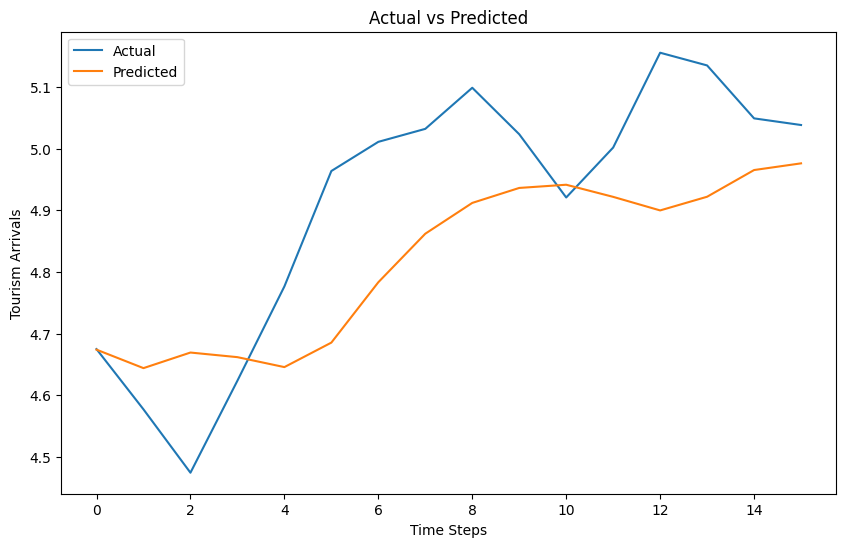

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred1, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Tourism Arrivals')
plt.legend()
plt.show()


In [ ]:
# Create a DataFrame
df_1_final = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred1
})

In [ ]:
# Display the DataFrame
print(df_1_final)

      y_test    y_pred
0   4.674889  4.577568
1   4.577147  4.564854
2   4.474391  4.573969
3   4.623621  4.557507
4   4.776476  4.562066
5   4.963651  4.614267
6   5.010957  4.728742
7   5.032010  4.807865
8   5.098661  4.859917
9   5.023285  4.891397
10  4.920744  4.886383
11  5.001725  4.857500
12  5.155485  4.847245
13  5.134862  4.883673
14  5.049016  4.920919
15  5.038258  4.923797


##SARIMA

###Train the model

In [ ]:
# Define the range of p, d, q and seasonal P, D, Q, m (seasonality period)
p = d = q = range(0, 3)  # (p, d, q) values for ARIMA
P = D = Q = range(0, 3)  # (P, D, Q, m) values for seasonal component
m = [12]  # Assuming monthly data; adjust accordingly for your seasonality

In [ ]:
# Generate all possible combinations of p, d, q and seasonal P, D, Q, m
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, m))

In [ ]:
# Empty lists to store results
best_aic = np.inf
best_params = None
results = []

In [ ]:
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit SARIMA model
            model = SARIMAX(y_train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)

            # Save model performance
            results.append((param, seasonal_param, model_fit.aic))

            # Select the model with the lowest AIC
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_params = (param, seasonal_param)

        except Exception as e:
            continue

In [ ]:
print(f'Best SARIMA parameters: {best_params} with AIC: {best_aic}')


Best SARIMA parameters: ((1, 1, 1), (0, 2, 1, 12)) with AIC: 8.0


In [ ]:
best_model_s = SARIMAX(y_train,
                     order=best_params[0],
                     seasonal_order=best_params[1],
                     enforce_stationarity=False,
                     enforce_invertibility=False)
best_model_s = best_model_s.fit(disp=False)

###Evaluate the Model

In [ ]:
n_periods = len(y_test)
y_pred_s = best_model_s.forecast(steps=n_periods)

In [ ]:
test_loss = mse
print(f'Test Loss (MSE): {test_loss}')

Test Loss (MSE): 0.0350441933604127


In [ ]:
# Convert predictions to pandas series
y_pred_s = pd.Series(y_pred_s, index=y_test.index)

In [ ]:
y_test

,Tourists_arrivals
0,4.674889
1,4.577147
2,4.474391
3,4.623621
4,4.776476
5,4.963651
6,5.010957
7,5.032010
8,5.098661
9,5.023285


In [ ]:
y_pred_s

,predicted_mean
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_s, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Tourism Arrivals')
plt.legend()
plt.show()

In [ ]:
results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
print(results_df)

##SVR

###Train the model

In [ ]:
# Set random seed for NumPy
np.random.seed(0)

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
svr = SVR()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [ ]:
grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=tscv)


In [ ]:
print(X_train.shape)

(63, 3)


In [ ]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [ ]:
best_params_svr = grid_search.best_params_
print("Best parameters:", best_params_svr)

Best parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
best_model_svr = SVR(**best_params_svr)
best_model_svr.fit(X_train, y_train)

SVR(C=100, epsilon=0.01, kernel='linear')

In [ ]:
best_model_svr.score(X_train, y_train)

0.8411323520047397

In [ ]:
# Make predictions on the test set using the best model
best_svr = grid_search.best_estimator_
y_pred_svr1 = best_svr.predict(X_test)

###Evaluate the model

In [ ]:
# Evaluate the model
mse_best_svr = mean_squared_error(y_test, y_pred_svr1)
print(f'Mean Squared Error: {mse_best_svr}')

mae_best_svr = mean_absolute_error(y_test, y_pred_svr1)
print(f'mean_absolute_error: {mae_best_svr}')

rmse_best_svr = np.sqrt(mse_best_svr)
print(f'Root Mean Squared Error (RMSE): {rmse_best_svr}')

mape_best_svr = mean_absolute_percentage_error(y_test, y_pred_svr1)
print(f'mean_absolute_percentage_error (MAPE): {mape_best_svr:.3f}')

Mean Squared Error: 0.011360493014233645
mean_absolute_error: 0.09374227155975184
Root Mean Squared Error (RMSE): 0.10658561354251166
mean_absolute_percentage_error (MAPE): 0.019


In [ ]:
y_pred_svr1 = y_pred_svr1.flatten()

In [ ]:
y_test = y_test.reset_index(drop=True)

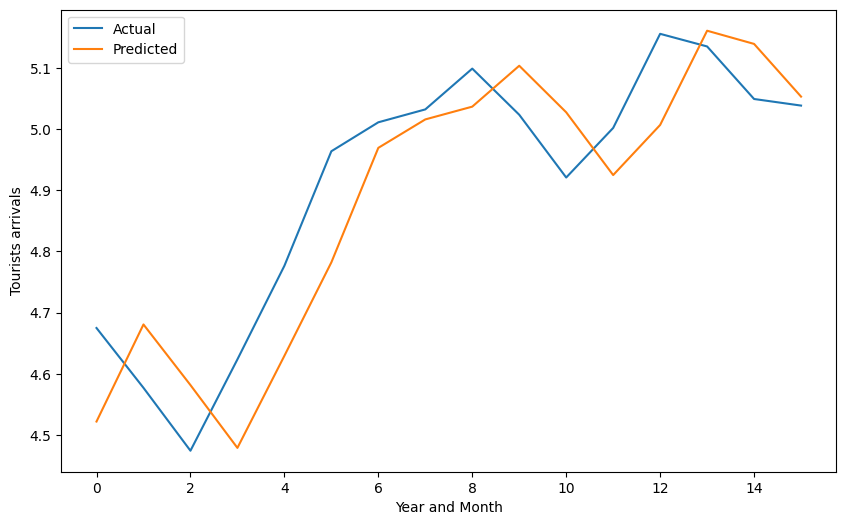

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot( y_pred_svr1, label='Predicted')
plt.xlabel('Year and Month')
plt.ylabel('Tourists arrivals')
plt.legend()
plt.show()

In [ ]:
results_df_svr = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_svr1})
print(results_df_svr)

      y_test    y_pred
0   4.674889  4.522079
1   4.577147  4.680675
2   4.474391  4.581663
3   4.623621  4.479020
4   4.776476  4.629428
5   4.963651  4.782090
6   5.010957  4.969187
7   5.032010  5.015654
8   5.098661  5.036529
9   5.023285  5.103336
10  4.920744  5.027285
11  5.001725  4.924737
12  5.155485  5.006614
13  5.134862  5.160560
14  5.049016  5.139006
15  5.038258  5.052919


##RF

###Train the model

In [ ]:
# Set random seed for NumPy
np.random.seed(0)

In [ ]:
param_grid_rf = {
    'n_estimators': [10, 20, 50],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [ ]:
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, scoring='neg_mean_squared_error', cv=tscv)


In [ ]:
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
try:
    grid_search_rf.fit(X_train, y_train)
except Exception as e:
    print(f"Error during fitting: {e}")

In [ ]:
# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best parameters:", best_params_rf)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}


In [ ]:
# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=20,
                      random_state=42)

In [ ]:
y_pred_rf1 = best_rf_model.predict(X_test)

###Evaluate the model

In [ ]:
# Evaluate the model
mse_best_rf = mean_squared_error(y_test, y_pred_rf1)
print(f'Mean Squared Error: {mse_best_rf}')

mae_best_rf = mean_absolute_error(y_test, y_pred_rf1)
print(f'mean_absolute_error: {mae_best_rf}')

rmse_best_rf = np.sqrt(mse_best_rf)
print(f'Root Mean Squared Error (RMSE): {rmse_best_rf}')

mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_rf1)
print(f'mean_absolute_percentage_error (MAPE): {mape_best_rf:.3f}')

Mean Squared Error: 0.03767527527672719
mean_absolute_error: 0.13247662239288305
Root Mean Squared Error (RMSE): 0.19410119854531344
mean_absolute_percentage_error (MAPE): 0.027


In [ ]:
y_pred_rf1 = y_pred_rf1.flatten()


In [ ]:
y_test = y_test.reset_index(drop=True)


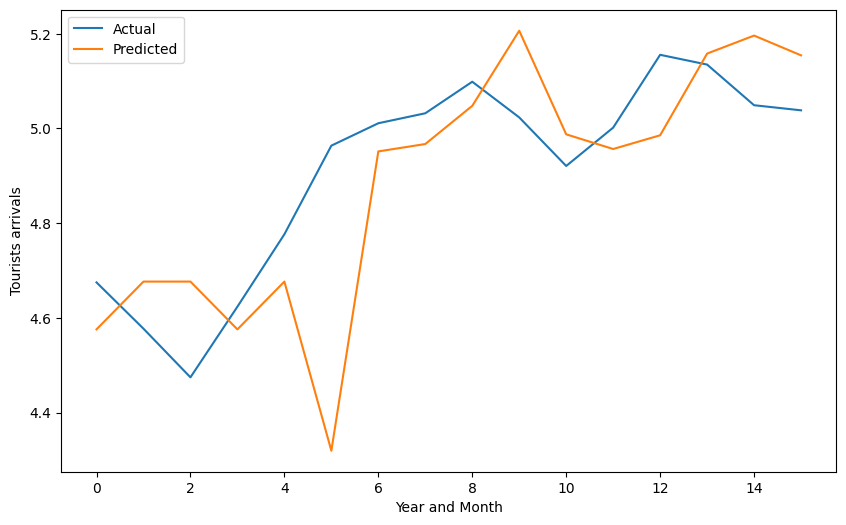

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot( y_pred_rf1, label='Predicted')
plt.xlabel('Year and Month')
plt.ylabel('Tourists arrivals')
plt.legend()
plt.show()

In [ ]:
results_df_rf = pd.DataFrame({'y_test': y_test, 'y_pred_rf1': y_pred_rf})
print(results_df_rf)

      y_test  y_pred_rf
0   4.674889   4.575665
1   4.577147   4.676591
2   4.474391   4.676591
3   4.623621   4.575665
4   4.776476   4.676591
5   4.963651   4.319432
6   5.010957   4.951481
7   5.032010   4.967067
8   5.098661   5.047730
9   5.023285   5.206345
10  4.920744   4.987548
11  5.001725   4.956555
12  5.155485   4.985542
13  5.134862   5.158074
14  5.049016   5.196106
15  5.038258   5.154330


#Weather Variables

##Create the weather dataset

In [ ]:
# Create lagged columns
Met_data_filled_V['AQI_Lag1'] = Met_data_filled_V['AQI'].shift(1)
Met_data_filled_V['AQI_Lag2'] = Met_data_filled_V['AQI'].shift(2)
Met_data_filled_V['AQI_Lag3'] = Met_data_filled_V['AQI'].shift(3)

In [ ]:
print(Met_data_filled_V)

      RH Max    RH Min  Temp Max  Temp Min       AQI  Wind Speed X  \
0   0.143691  0.212145  0.403309  0.006782  0.724822      1.000000   
1   0.204345  0.201223  0.455917  0.103052  0.681086      0.701754   
2   0.654137  0.460392  0.438815  0.459683  0.615699      0.666667   
3   0.302232  0.499968  0.762736  0.972469  0.283735      0.719298   
4   0.432308  0.699645  0.576286  0.840995  0.181348      0.824561   
..       ...       ...       ...       ...       ...           ...   
77  0.447653  0.873598  0.423125  0.903165  0.172323      0.593567   
78  0.449005  0.839959  0.252182  0.898267  0.191279      0.587719   
79  0.449005  0.839959  0.252182  0.898267  0.174244      0.578947   
80  0.449005  0.839959  0.252182  0.898267  0.083531      0.500000   
81  0.449005  0.839959  0.252182  0.898267  0.220893      0.236842   

    Wind Speed Y  Tourists Arrivals  Tourism Arrivals Lag1  \
0       0.661017           5.341177                    NaN   
1       0.542373           5.295626

In [ ]:
# Create a subset DataFrame with only tourism arrivals and the lag columns
df_2 = Met_data_filled_V[['Tourists Arrivals', 'AQI_Lag1', 'AQI_Lag2', 'AQI_Lag3', 'AQI']]

In [ ]:
# Remove the first 3 rows (which have NaN values)
df_2 = df_2.iloc[3:].reset_index(drop=True)

In [ ]:
df_2

,Tourists_arrivals,AQI_Lag1,AQI_Lag2,AQI_Lag3,AQI
0,5.204822,0.615699,0.681086,0.724822,0.283735
1,5.086007,0.283735,0.615699,0.681086,0.181348
2,5.091178,0.181348,0.283735,0.615699,0.149332
3,5.312795,0.149332,0.181348,0.283735,0.160312
4,5.280892,0.160312,0.149332,0.181348,0.108831
...,...,...,...,...,...
74,5.001725,0.190270,0.384438,0.581721,0.172323
75,5.155485,0.172323,0.190270,0.384438,0.191279
76,5.134862,0.191279,0.172323,0.190270,0.174244
77,5.049016,0.174244,0.191279,0.172323,0.083531


###Split the dataset

In [ ]:
# split the dataset
X = df_2[['AQI_Lag1', 'AQI_Lag2', 'AQI_Lag3','AQI']]
y = df_2['Tourists Arrivals']

In [ ]:
split_index = int(0.8 * len(X))  # 80% for training, 20% for testing

In [ ]:
# Training data
X_train = X[:split_index]
y_train = y[:split_index]

In [ ]:
# Testing data
X_test = X[split_index:]
y_test = y[split_index:]


##LSTM

###Train the model

In [ ]:
# Convert DataFrame to NumPy array
X_train = X_train.values

# Reshape the NumPy array (assuming timesteps=1 for now)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Similarly, convert and reshape the validation split
X_test = X_test.values
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Function to create LSTM model
def create_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
# Define the grid of hyperparameters to search
param_grid = {
    'units': [18, 36, 64],                # Number of LSTM units
    'batch_size': [16, 32, 64],             # Batch sizes
    'epochs': [15, 30],                    # Number of epochs
    'dropout_rate': [0.2, 0.3, 0.4],        # Dropout rates
    'optimizer': ['adam', 'rmsprop']        # Optimizers to try
}

In [ ]:
# Function to perform manual grid search
def manual_grid_search(param_grid):
    best_score = float('inf')
    best_params = None

    # Iterate over all combinations of hyperparameters
    for units in param_grid['units']:
        for dropout_rate in param_grid['dropout_rate']:
            for optimizer_name in param_grid['optimizer']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        # Create the model with current hyperparameters
                        model = create_model(units=units, dropout_rate=dropout_rate, optimizer=optimizer_name)

                        # Fit the model on training data
                        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                        # Evaluate the model on validation data
                        predictions = model.predict(X_test)
                        score = mean_squared_error(y_test, predictions)

                        # Check if this is the best model so far
                        if score < best_score:
                            best_score = score
                            best_params = {
                                'units': units,
                                'dropout_rate': dropout_rate,
                                'optimizer': optimizer_name,
                                'epochs': epochs,
                                'batch_size': batch_size
                            }
                        print(f"Tested params: units={units}, dropout_rate={dropout_rate}, optimizer={optimizer_name}, epochs={epochs}, batch_size={batch_size}, MSE={score:.4f}")

    return best_params, best_score

In [ ]:
# Perform grid search
best_params, best_score = manual_grid_search(param_grid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
Tested params: units=18, dropout_rate=0.2, optimizer=adam, epochs=15, batch_size=16, MSE=22.0256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Tested params: units=18, dropout_rate=0.2, optimizer=adam, epochs=15, batch_size=32, MSE=22.7967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Tested params: units=18, dropout_rate=0.2, optimizer=adam, epochs=15, batch_size=64, MSE=23.7655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Tested params: units=18, dropout_rate=0.2, optimizer=adam, epochs=30, batch_size=16, MSE=18.3232
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Tested params: units=18, dropout_rate=0.2, optimizer=adam, epochs=30, batch_size=32, MSE=21.4946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Tested params: units=18, dropout_rate=0.2, optimizer=adam, epochs=30, batch_size=64, MSE=22.8482
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Tested params: units=18, dropout_rate=0.2, optimizer=rmsprop, epochs=15, batch_size=16, MSE=21.0719
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Tested

In [ ]:
print(f"Best parameters: {best_params}")
print(f"Best validation MSE: {best_score:.4f}")

Best parameters: {'units': 64, 'dropout_rate': 0.2, 'optimizer': 'adam', 'epochs': 30, 'batch_size': 16}
Best validation MSE: 9.9926


In [ ]:
# Create the model with the best parameters
best_model = create_model(
    units=best_params['units'],
    dropout_rate=best_params['dropout_rate'],
    optimizer=best_params['optimizer']
)

In [ ]:
tf.random.set_seed(42)

In [ ]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 21.2002
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.9121 
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.5401 
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.2509 
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.9074 
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.5902 
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2234 
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.9110  
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.4856 
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.0506 
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6519 
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.2554 
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.8689 
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.4664 
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.0244 
Epoch 16/30
4/4 ━━━

###Evaluate the Model

In [ ]:
loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')


Test Loss: 9.567005157470703


In [ ]:
y_pred2 = best_model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


In [ ]:
y_pred2

array([[3.3685782],
       [3.1391342],
       [3.1527438],
       [3.3232207],
       [4.2054515],
       [4.8430862],
       [5.1556196],
       [5.372116 ],
       [5.3263197],
       [4.903591 ],
       [4.273836 ],
       [3.9496484],
       [3.6372902],
       [3.4072616],
       [3.2152796],
       [3.3836725]], dtype=float32)

In [ ]:
y_test

,Tourists_arrivals
63,4.674889
64,4.577147
65,4.474391
66,4.623621
67,4.776476
68,4.963651
69,5.010957
70,5.032010
71,5.098661
72,5.023285


In [ ]:
y_pred2 = y_pred2.flatten()


In [ ]:
y_test = y_test.reset_index(drop=True)


In [ ]:
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mape = mean_absolute_percentage_error(y_test, y_pred2)
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'mean_absolute_percentage_error (MAPE): {mape:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



Mean Squared Error: 9.567005363154657
Mean Absolute Error: 3.032767350223893
mean_absolute_percentage_error (MAPE): 0.620
Root Mean Squared Error (RMSE): 3.0930576074743024


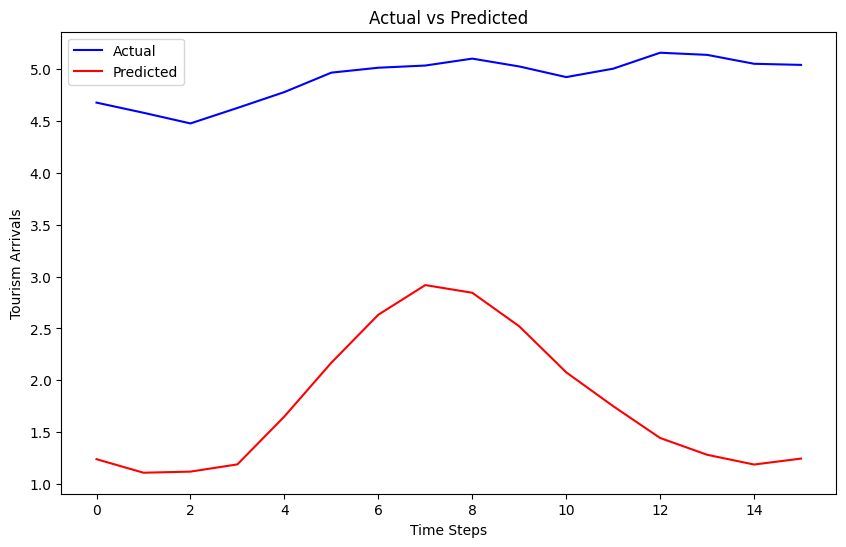

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred2, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Tourism Arrivals')
plt.legend()
plt.show()


In [ ]:
# Create a DataFrame
df_1_final = pd.DataFrame({
    'y_test': y_test,
    'y_pred2': y_pred
})

In [ ]:
# Display the DataFrame
print(df_1_final)

      y_test    y_pred
0   4.674889  3.368578
1   4.577147  3.139134
2   4.474391  3.152744
3   4.623621  3.323221
4   4.776476  4.205451
5   4.963651  4.843086
6   5.010957  5.155620
7   5.032010  5.372116
8   5.098661  5.326320
9   5.023285  4.903591
10  4.920744  4.273836
11  5.001725  3.949648
12  5.155485  3.637290
13  5.134862  3.407262
14  5.049016  3.215280
15  5.038258  3.383672


##SVR

###Train the model

In [ ]:
# Set random seed for NumPy
np.random.seed(0)

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
svr = SVR()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [ ]:
grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=tscv)


In [ ]:
print(X_train.shape)

(63, 4)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D


In [ ]:
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [ ]:
best_params_svr = grid_search.best_params_
print("Best parameters:", best_params_svr)

Best parameters: {'C': 1, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
best_model_svr = SVR(**best_params_svr)
best_model_svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.5, gamma='auto')

In [ ]:
best_model_svr.score(X_train, y_train)

0.09067518572258104

In [ ]:
# Make predictions on the test set using the best model
best_svr = grid_search.best_estimator_
y_pred_svr2 = best_svr.predict(X_test)

###Evaluate the model

In [ ]:
# Evaluate the model
mse_best_svr = mean_squared_error(y_test, y_pred_svr2)
print(f'Mean Squared Error: {mse_best_svr}')

mae_best_svr = mean_absolute_error(y_test, y_pred_svr2)
print(f'mean_absolute_error: {mae_best_svr}')

rmse_best_svr = np.sqrt(mse_best_svr)
print(f'Root Mean Squared Error (RMSE): {rmse_best_svr}')

mape_best_svr = mean_absolute_percentage_error(y_test, y_pred_svr2)
print(f'mean_absolute_percentage_error (MAPE): {mape_best_svr:.3f}')

Mean Squared Error: 0.16255179657953944
mean_absolute_error: 0.3304746119620789
Root Mean Squared Error (RMSE): 0.4031771280461473
mean_absolute_percentage_error (MAPE): 0.066


In [ ]:
y_pred_svr2 = y_pred_svr1.flatten()


In [ ]:
y_test = y_test.reset_index(drop=True)


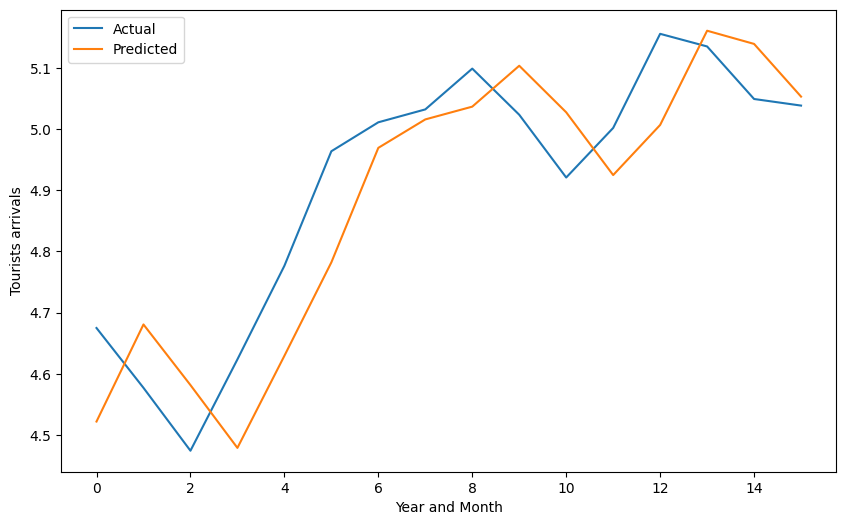

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot( y_pred_svr2, label='Predicted')
plt.xlabel('Year and Month')
plt.ylabel('Tourists arrivals')
plt.legend()
plt.show()

In [ ]:
results_df_svr = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_svr1})
print(results_df_svr)

      y_test    y_pred
0   4.674889  4.396583
1   4.577147  4.345828
2   4.474391  4.348631
3   4.623621  4.410235
4   4.776476  4.743381
5   4.963651  4.897563
6   5.010957  4.907815
7   5.032010  4.872821
8   5.098661  4.866775
9   5.023285  4.760529
10  4.920744  4.576681
11  5.001725  4.488836
12  5.155485  4.456242
13  5.134862  4.424299
14  5.049016  4.351194
15  5.038258  4.420170


##RF

###Train the model

In [ ]:
# Set random seed for NumPy
np.random.seed(0)

In [ ]:
param_grid_rf = {
    'n_estimators': [10, 20, 50],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [ ]:
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, scoring='neg_mean_squared_error', cv=tscv)


In [ ]:
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
try:
    grid_search_rf.fit(X_train, y_train)
except Exception as e:
    print(f"Error during fitting: {e}")

In [ ]:
# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best parameters:", best_params_rf)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}


In [ ]:
# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=20, random_state=42)

In [ ]:
y_pred_rf2 = best_rf_model.predict(X_test)

###Evaluate the model

In [ ]:
# Evaluate the model
mse_best_rf = mean_squared_error(y_test, y_pred_rf2)
print(f'Mean Squared Error: {mse_best_rf}')

mae_best_rf = mean_absolute_error(y_test, y_pred_rf2)
print(f'mean_absolute_error: {mae_best_rf}')

rmse_best_rf = np.sqrt(mse_best_rf)
print(f'Root Mean Squared Error (RMSE): {rmse_best_rf}')

mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_rf2)
print(f'mean_absolute_percentage_error (MAPE): {mape_best_rf:.3f}')

Mean Squared Error: 0.2701558910976102
mean_absolute_error: 0.41849893967226026
Root Mean Squared Error (RMSE): 0.5197652269030799
mean_absolute_percentage_error (MAPE): 0.085


In [ ]:
y_pred_rf2 = y_pred_rf2.flatten()


In [ ]:
y_test = y_test.reset_index(drop=True)


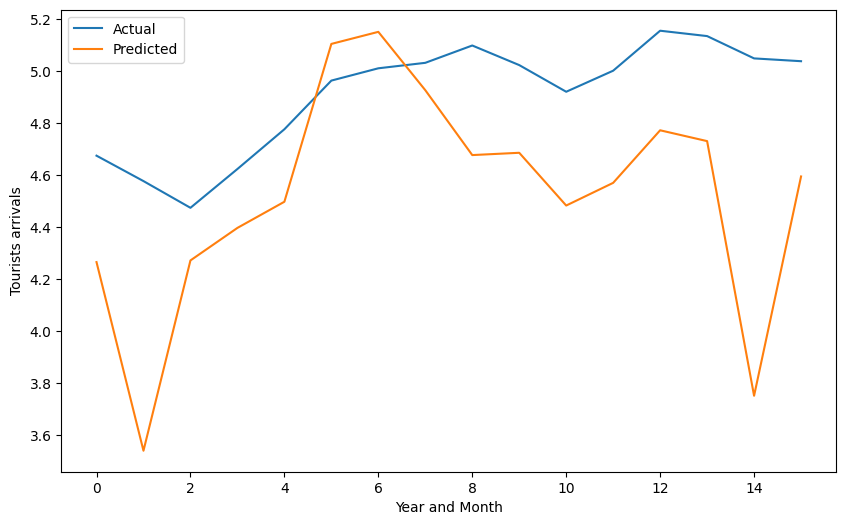

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot( y_pred_rf2, label='Predicted')
plt.xlabel('Year and Month')
plt.ylabel('Tourists arrivals')
plt.legend()
plt.show()

In [ ]:
results_df_rf = pd.DataFrame({'y_test': y_test, 'y_pred_rf': y_pred_rf2})
print(results_df_rf)

      y_test  y_pred_rf
0   4.674889   4.265627
1   4.577147   3.540111
2   4.474391   4.271975
3   4.623621   4.397076
4   4.776476   4.497685
5   4.963651   5.104743
6   5.010957   5.151154
7   5.032010   4.926784
8   5.098661   4.677205
9   5.023285   4.686019
10  4.920744   4.483122
11  5.001725   4.570380
12  5.155485   4.772541
13  5.134862   4.730899
14  5.049016   3.751467
15  5.038258   4.594983


In [ ]:
Test_year['date']

,date
65,2022-9
66,2022-10
67,2022-11
68,2022-12
69,2023-1
70,2023-2
71,2023-3
72,2023-4
73,2023-5
74,2023-6


In [ ]:
y_test

,Tourists Arrivals
0,4.674889
1,4.577147
2,4.474391
3,4.623621
4,4.776476
5,4.963651
6,5.010957
7,5.032010
8,5.098661
9,5.023285


#Figure

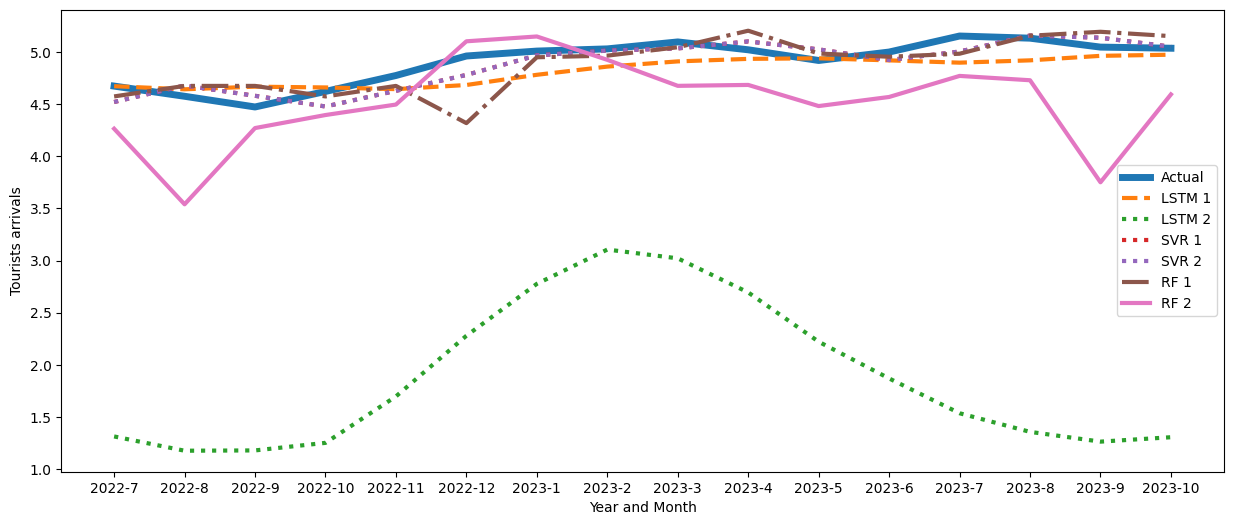

In [ ]:
# Visualize the results
plt.figure(figsize=(15, 6))
plt.plot(Test_year['date'], y_test, label='Actual' , linewidth='5')
plt.plot(Test_year['date'], y_pred1, label='LSTM 1', linestyle = '--', linewidth= '3')
plt.plot(Test_year['date'], y_pred2, label='LSTM 2', linestyle = 'dotted', linewidth='3')
plt.plot(Test_year['date'], y_pred_svr1, label='SVR 1', linestyle = 'dotted', linewidth='3')
plt.plot(Test_year['date'], y_pred_svr2, label='SVR 2', linestyle = ':', linewidth='3' )
plt.plot(Test_year['date'], y_pred_rf1, label='RF 1', linestyle = '-.', linewidth='3' )
plt.plot(Test_year['date'], y_pred_rf2, label='RF 2', linewidth = '3')
plt.xlabel('Year and Month')
plt.ylabel('Tourists arrivals')
plt.legend()
plt.show()
